In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
from statsmodels.tsa.stattools import acf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Data Preprocessing and Selection of Best Ticker Based on Missing Data Rate

The following code is used to preprocess the SDG data file and identify the best ticker based on the overall missing data rate. The steps are as follows:

1. **Load the Data**: The data is loaded from a CSV file and the first column is removed as it may contain irrelevant data (such as an index).
2. **Check Ticker Counts**: The number of records for each ticker is counted to understand the distribution of data across different tickers.
3. **Calculate Overall Missing Rate for Each Ticker**: The missing rate for each ticker is calculated by taking the mean of missing values for each column and then averaging these means. This gives an overall missing rate for each ticker.
4. **Identify Best Ticker**: The ticker with the lowest overall missing rate is identified. This ticker is considered the best for further analysis due to its minimal missing data.

In [130]:
df = pd.read_csv('/root/autodl-tmp/7.18_SDG预测/data/SDG_Data_File_Daily.csv')
df = df.iloc[:,1:]
df['Ticker'].value_counts()
overall_missing_rate = df.groupby('Ticker').apply(lambda x: x.isnull().mean().mean())
best_overall_ticker = overall_missing_rate.idxmin()
lowest_overall_missing_rate = overall_missing_rate.min()
print(best_overall_ticker)
print(lowest_overall_missing_rate)

FB
0.0023509724291340987


## Filtering and Visualizing Missing Data for a Specific Ticker

The following code filters the data for a specific ticker ('FB') and visualizes the missing data matrix using the `missingno` library.

1. **Filter Data**: The data is filtered to include only records for the ticker 'FB'.
2. **Visualize Missing Data**: The missing data matrix is visualized to understand the pattern and extent of missing values.

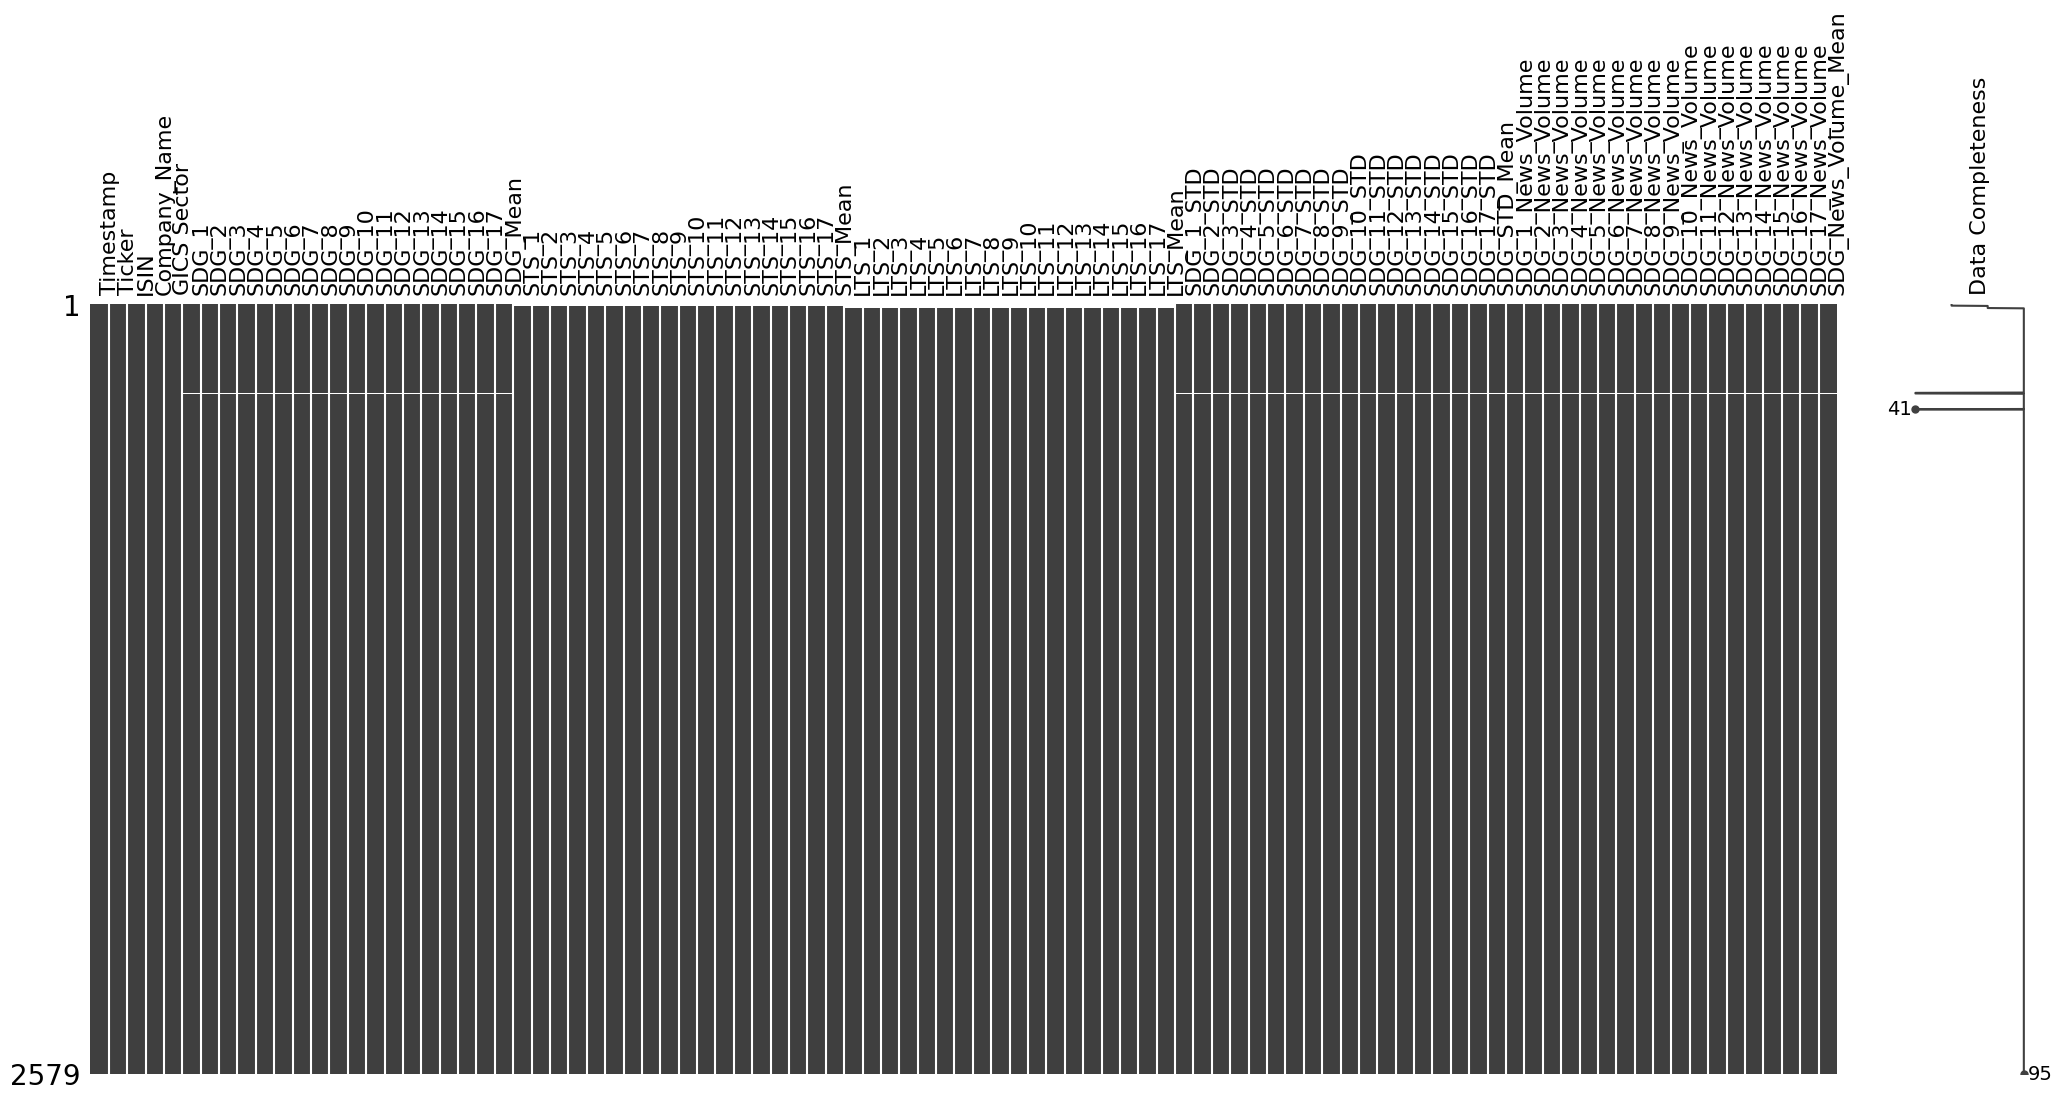

In [131]:
df_FB = df.query("Ticker=='FB'")
msn.matrix(df_FB, labels = True,label_rotation = 90)
plt.show()

## Calculating and Plotting Autocorrelation for SDG Columns

The following code calculates and plots the autocorrelation function (ACF) for each SDG column in the 'FB' ticker data. The ACF helps in identifying the periodicity and correlation of the data over different lags.

1. **Define Function**: A function `plot_and_calculate_acf` is defined to calculate the ACF values for a given column and optionally plot the ACF.
2. **Calculate ACF for Each SDG Column**: For each SDG column, the ACF values are calculated and the maximum ACF value (excluding lag 0) is stored.
3. **Sort and Print Results**: The SDG columns are sorted by their maximum ACF values in descending order, and the results are printed.

In [132]:

def plot_and_calculate_acf(df, column,is_show):
    acf_values = acf(df[column].dropna(), nlags=40)
    if is_show:
        plt.figure(figsize=(10, 6))
        plot_acf(df[column].dropna(), lags=40)
        plt.title(f'ACF for {column}')
        plt.show()
    return acf_values

sdg_columns = [f'SDG_{i}' for i in range(1, 18)]
acf_results = {}

for column in sdg_columns:
    acf_values = plot_and_calculate_acf(df_FB, column,is_show=False)
    acf_results[column] = max(acf_values[1:])  

sorted_acf_results = sorted(acf_results.items(), key=lambda x: x[1], reverse=True)

print("SDG columns with the most evident periodicity:")
for column, value in sorted_acf_results:
    print(f'{column}: {value:.2f}')


SDG columns with the most evident periodicity:
SDG_3: 0.78
SDG_10: 0.74
SDG_11: 0.74
SDG_16: 0.70
SDG_9: 0.67
SDG_8: 0.65
SDG_1: 0.65
SDG_2: 0.63
SDG_4: 0.63
SDG_13: 0.60
SDG_15: 0.59
SDG_14: 0.53
SDG_12: 0.51
SDG_5: 0.50
SDG_17: 0.48
SDG_7: 0.42
SDG_6: 0.41


## Filtering and Plotting Time Series Data for a Specific SDG

The following code filters the data for a specific SDG column ('SDG_3') in the 'FB' ticker data and plots the time series.

1. **Filter Data**: The data is filtered to include only the 'Timestamp' and 'SDG_3' columns.
2. **Convert to Datetime**: The 'Timestamp' column is converted to datetime format.
3. **Set Index**: The 'Timestamp' column is set as the index of the DataFrame.
4. **Plot Time Series**: The time series of 'SDG_3' is plotted.

<ipython-input-133-647d0589fedd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SDG['Timestamp'] = pd.to_datetime(df_SDG['Timestamp'])


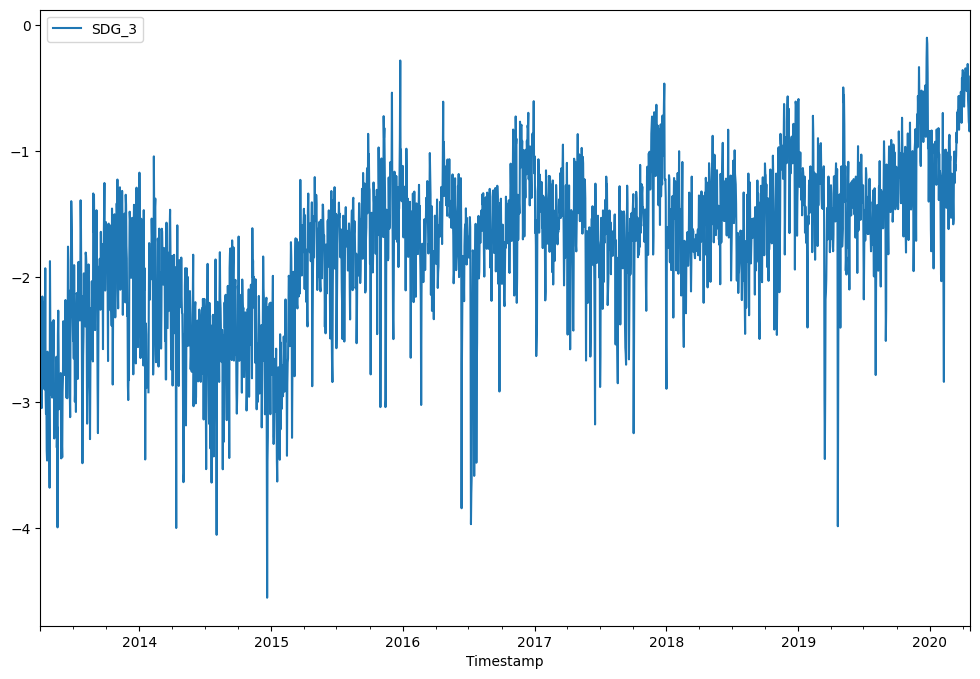

In [133]:
df_SDG = df_FB[['Timestamp','SDG_3']]
df_SDG['Timestamp'] = pd.to_datetime(df_SDG['Timestamp'])
df_SDG.set_index('Timestamp', inplace=True)
df_SDG.plot(figsize=(12,8))
plt.show()

## Handling Missing Data in Time Series for a Specific SDG

The following code handles missing data in the 'SDG_3' column for the 'FB' ticker data. It first checks for missing values and then interpolates the missing data using linear interpolation.

1. **Check Missing Data**: Count the number of missing values in the 'SDG_3' column.
2. **Interpolate Missing Data**: Interpolate missing values in the 'SDG_3' column using linear interpolation.

In [134]:
print(df_SDG.isnull().sum())
df_SDG['SDG_3'] = df_SDG['SDG_3'].interpolate(method='linear')

SDG_3    4
dtype: int64


<ipython-input-134-f7497af89c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SDG['SDG_3'] = df_SDG['SDG_3'].interpolate(method='linear')


## Visualizing Data Distribution, Autocorrelation, and Time Series for a Specific SDG

The following code visualizes the distribution of the 'SDG_3' column using a boxplot, plots the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF), and finally plots the time series for the first 200 observations.

1. **Boxplot**: Visualize the distribution of 'SDG_3' using a boxplot.
2. **ACF Plot**: Plot the Autocorrelation Function (ACF) to understand the correlation of the time series with its own past values.
3. **PACF Plot**: Plot the Partial Autocorrelation Function (PACF) to understand the direct correlation of the time series with its own past values.
4. **Time Series Plot**: Plot the time series for the first 200 observations.

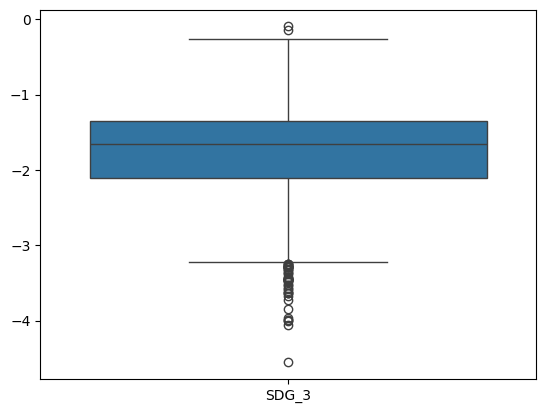

<Figure size 1200x600 with 0 Axes>

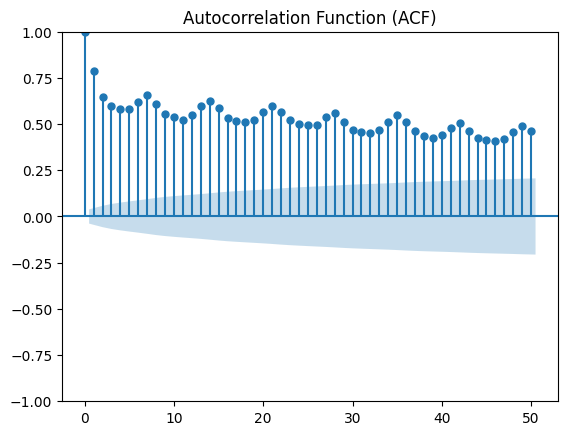

<Figure size 1200x600 with 0 Axes>

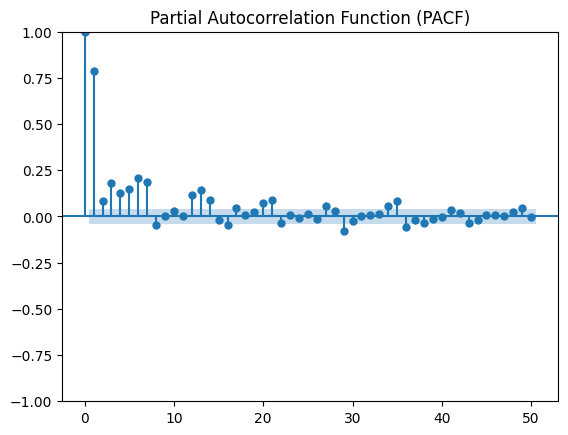

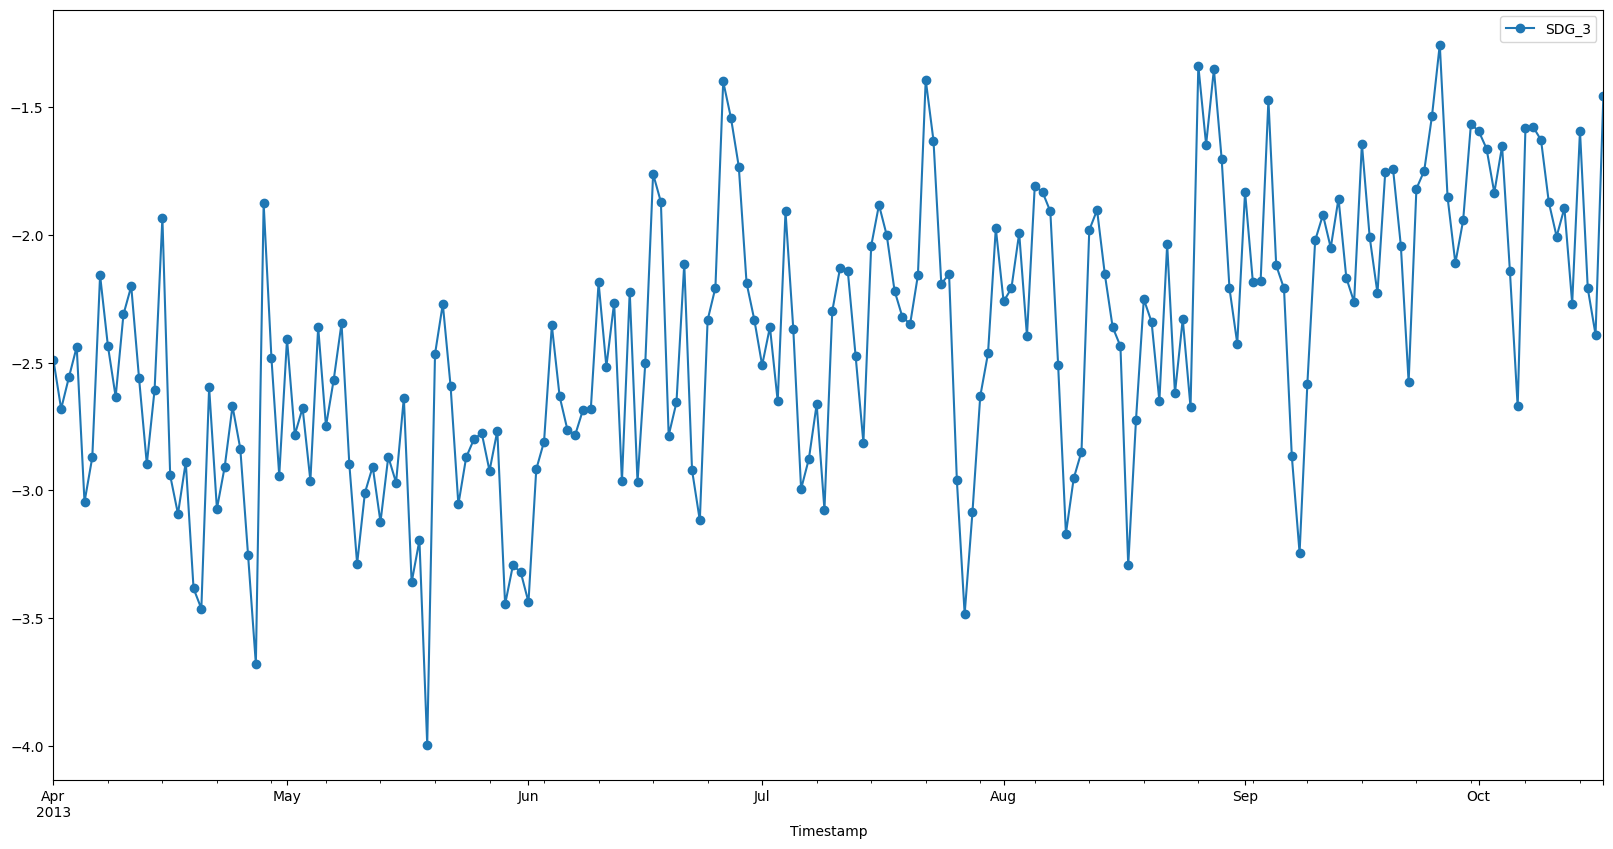

In [135]:
sns.boxplot(data=df_SDG)
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(df_SDG['SDG_3'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_SDG['SDG_3'], lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

df_SDG[:200].plot(figsize=(20,10),marker='o')
plt.show()

 ## Saving the Preprocessed Data to CSV

The following code saves the preprocessed DataFrame `df_SDG` to a CSV file. This step ensures that the cleaned and processed data can be easily accessed and used for future analysis or modeling.

In [136]:
df_SDG.to_csv('/root/autodl-tmp/7.18_SDG预测/data/FB_SDG_3.csv')
df_FBS = pd.read_csv('/root/autodl-tmp/7.18_SDG预测/data/FB_Daily_Return.csv')
df_FBS['Timestamp'] = pd.to_datetime(df_FBS['Timestamp'])
df_FB['Timestamp'] = pd.to_datetime(df_FB['Timestamp'])
df_FBA = pd.merge(df_FB, df_FBS, on='Timestamp', how='left')
df_FBA = df_FBA.interpolate(method='linear')
df_FBA  = df_FBA.fillna(method='bfill')
df_FBA = df_FBA[['Timestamp','STS_3','LTS_3','LTS_Mean','SDG_3_STD','SDG_STD_Mean','SDG_3_News_Volume','Log Return','SDG_3']]

<ipython-input-136-dba6ef20b5ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FB['Timestamp'] = pd.to_datetime(df_FB['Timestamp'])


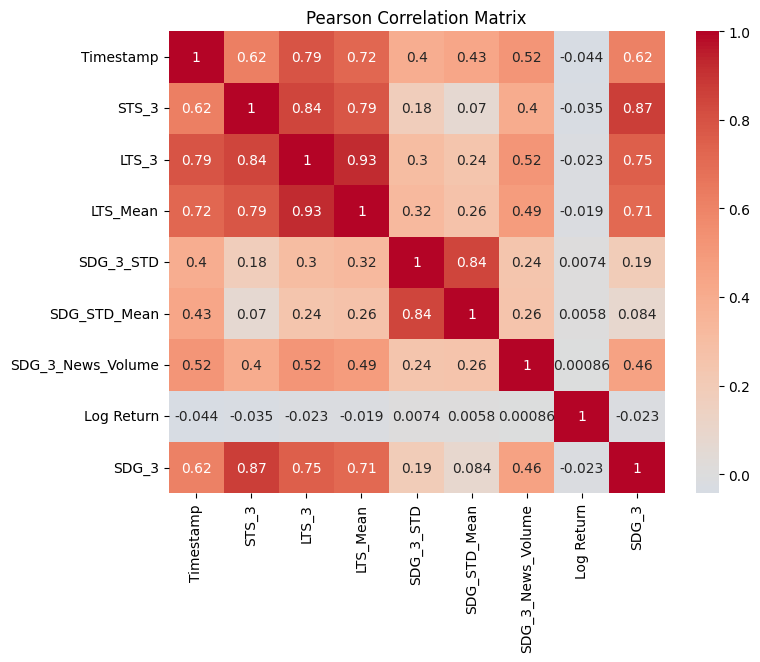

In [137]:
correlation_matrix = df_FBA.corr(method='pearson')

# 绘制皮尔逊相关系数矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [138]:
df_FBA.to_csv('/root/autodl-tmp/7.18_SDG预测/data/FB_SDG_3_A.csv',index=False)